In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.13.0'

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [7]:
model = models.Sequential()

In [8]:
model

In [9]:
model.add(layers.Input((150,150,3)))

In [10]:
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

In [11]:
model.add(layers.MaxPooling2D(pool_size = (2,2)))

In [12]:
model.add(layers.Flatten())

In [14]:
model.add(layers.Dense(64, activation='relu'))

In [15]:
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
optimizer = keras.optimizers.SGD(learning_rate= 0.002, momentum=0.8)

In [19]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)

In [20]:
model.compile(optimizer=optimizer,loss=loss, metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_gen = ImageDataGenerator(rescale=1./255)

In [25]:
train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/train',
    class_mode = 'binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.


In [26]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [27]:
test_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/test',
    class_mode = 'binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 394 images belonging to 2 classes.


In [28]:
test_ds.class_indices

{'dino': 0, 'dragon': 1}

In [29]:
X,y = next(train_ds)

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 500s 6s/step - loss: 0.7137 - accuracy: 0.5207 - val_loss: 0.6917 - val_accuracy: 0.4975
Epoch 2/10
80/80 [==============================] - 7s 88ms/step - loss: 0.6821 - accuracy: 0.5885 - val_loss: 0.6692 - val_accuracy: 0.5381
Epoch 3/10
80/80 [==============================] - 8s 98ms/step - loss: 0.6261 - accuracy: 0.7177 - val_loss: 0.5712 - val_accuracy: 0.8096
Epoch 4/10
80/80 [==============================] - 7s 89ms/step - loss: 0.5330 - accuracy: 0.7547 - val_loss: 0.5424 - val_accuracy: 0.6878
Epoch 5/10
80/80 [==============================] - 8s 99ms/step - loss: 0.4588 - accuracy: 0.7980 - val_loss: 0.4571 - val_accuracy: 0.7868
Epoch 6/10
80/80 [==============================] - 8s 96ms/step - loss: 0.3909 - accuracy: 0.8381 - val_loss: 0.4245 - val_accuracy: 0.8173
Epoch 7/10
80/80 [==============================] - 7s 92ms/step - loss: 0.3447 - accuracy: 0.8538 - val_loss: 0.3448 - val_accuracy: 0.8579
Epoch 8/10
80

In [40]:
import numpy as np

In [44]:
np.median(np.array(history.history['accuracy']))

0.8180677592754364

In [45]:
np.std(np.array(history.history['loss']))

0.1597238340298172

In [50]:
train_gen2 = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

In [51]:
train_ds2 = train_gen2.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/train',
    class_mode = 'binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.


In [52]:
test_ds2 = train_gen2.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon/test',
    class_mode = 'binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 394 images belonging to 2 classes.


In [54]:
history2 = model.fit(train_ds2, epochs=10, validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 17s 217ms/step - loss: 0.3472 - accuracy: 0.8444 - val_loss: 0.5328 - val_accuracy: 0.7843
Epoch 2/10
80/80 [==============================] - 16s 201ms/step - loss: 0.3461 - accuracy: 0.8601 - val_loss: 0.4987 - val_accuracy: 0.7893
Epoch 3/10
80/80 [==============================] - 16s 200ms/step - loss: 0.3470 - accuracy: 0.8563 - val_loss: 0.3202 - val_accuracy: 0.8579
Epoch 4/10
80/80 [==============================] - 16s 197ms/step - loss: 0.3168 - accuracy: 0.8670 - val_loss: 0.3183 - val_accuracy: 0.8731
Epoch 5/10
80/80 [==============================] - 17s 215ms/step - loss: 0.3326 - accuracy: 0.8563 - val_loss: 0.2561 - val_accuracy: 0.8909
Epoch 6/10
80/80 [==============================] - 16s 197ms/step - loss: 0.3118 - accuracy: 0.8764 - val_loss: 0.2655 - val_accuracy: 0.8858
Epoch 7/10
80/80 [==============================] - 16s 197ms/step - loss: 0.3460 - accuracy: 0.8595 - val_loss: 0.3996 - val_accuracy: 0.8426

In [139]:
np.median(np.array(history2.history['accuracy'][5:]))

0.8544542193412781

In [62]:
np.std(np.array(history2.history['loss']))

0.01365880566112401

In [63]:
from tensorflow.keras.preprocessing.image import load_img

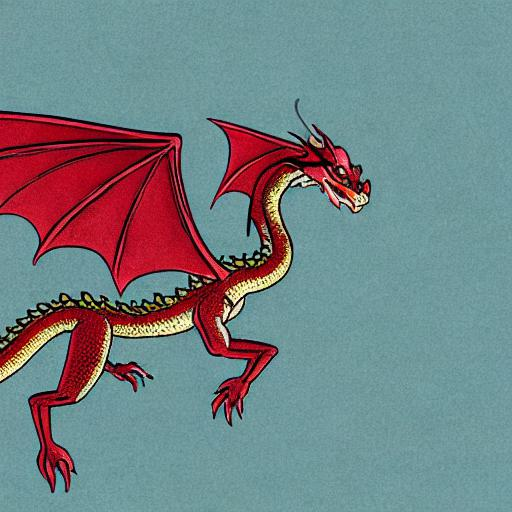

In [164]:
path = '/content/drive/MyDrive/dino-dragon/test/dragon'
name= '1e07914f-530e-4087-a377-cded306c360c.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [165]:
img = load_img(fullname, target_size=(150, 150))

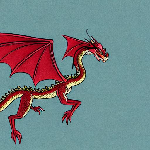

In [166]:
img


In [167]:
test = np.array(img)

In [168]:
Test = np.array([test])

In [169]:
Test.shape

(1, 150, 150, 3)

In [170]:
pred = model.predict(Test)

1/1 [==============================] - 0s 18ms/step


In [171]:
pred

array([[1.]], dtype=float32)